In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [161]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [163]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

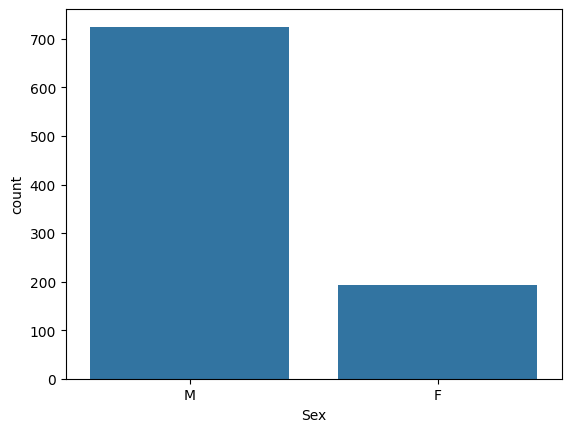

In [164]:
sns.countplot(x = "Sex", data=df)
plt.show()

In [165]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

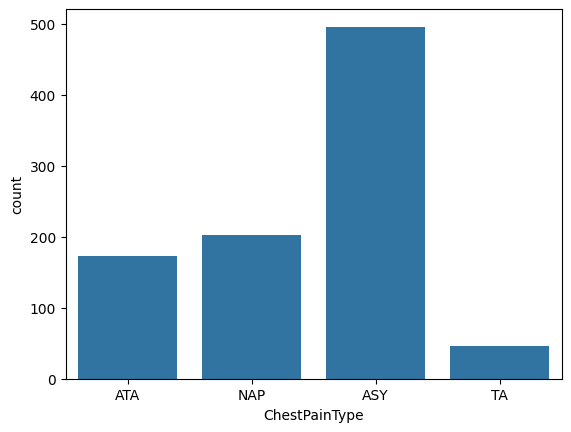

In [166]:
sns.countplot(x = "ChestPainType", data=df)
plt.show()

In [167]:
df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

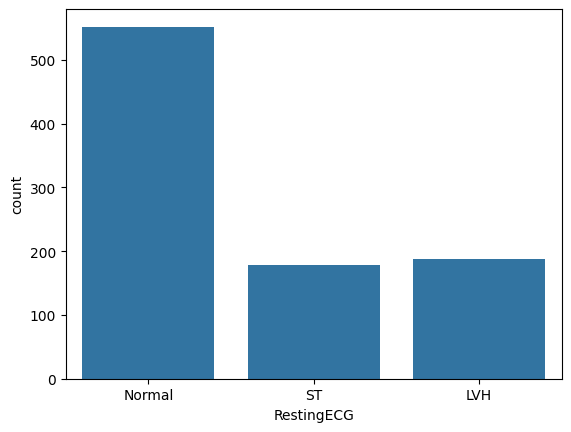

In [168]:
sns.countplot(x = "RestingECG", data=df)
plt.show()

In [169]:
df['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

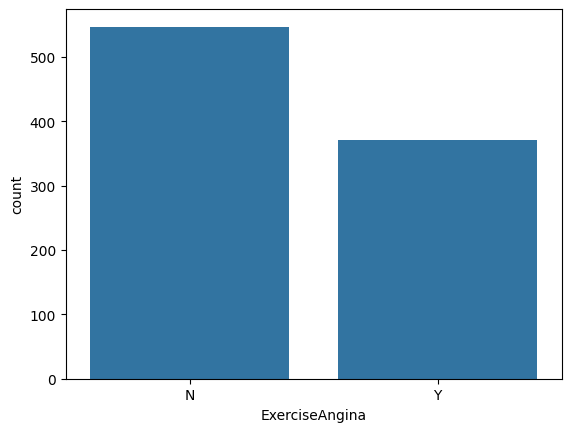

In [170]:
sns.countplot(x = "ExerciseAngina", data=df)
plt.show()

In [171]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

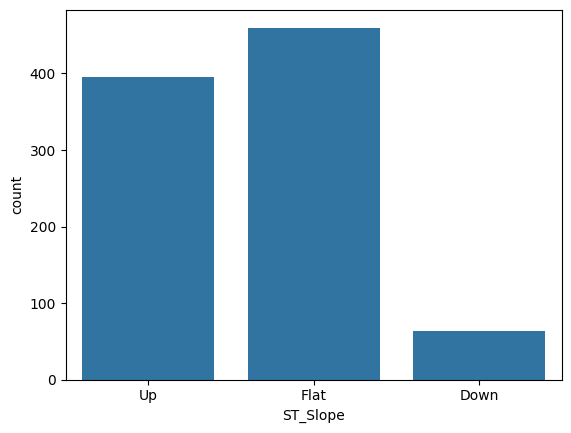

In [172]:
sns.countplot(x = "ST_Slope", data=df)
plt.show()

In [173]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


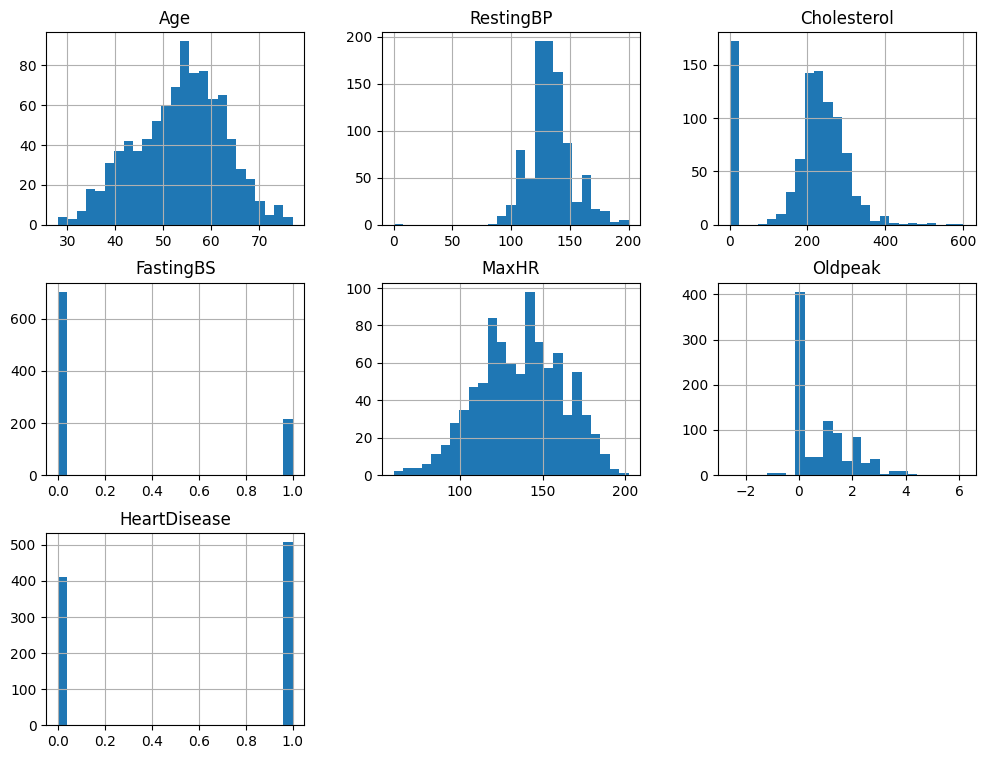

In [174]:
df.hist(bins = 25, figsize=(12,9))
plt.show()

In [175]:
print("Number of duplicates ", np.sum(df.duplicated()))
df.drop_duplicates(inplace=True)
print("Number of duplicates after dropping ", np.sum(df.duplicated()))

Number of duplicates  0
Number of duplicates after dropping  0


In [176]:
corr_matrix = df.corr(numeric_only=True)

In [177]:
corr_matrix["HeartDisease"].sort_values(ascending = False)

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64

### Changing the Object Data in the Numerical Data (We can also use ItidfVectorizer, I choose long method)

In [178]:
Sex_category = df[['Sex']]
Sex_category.head(10)

,Sex
0,M
1,F
2,M
3,F
4,M
5,M
6,F
7,M
8,M
9,F


In [179]:
Cheast_pain_type = df[['ChestPainType']]
Cheast_pain_type.head(10)

,ChestPainType
0,ATA
1,NAP
2,ATA
3,ASY
4,NAP
5,NAP
6,ATA
7,ATA
8,ASY
9,ATA


In [180]:
Resting_ECG = df[['RestingECG']]
Resting_ECG.head(10)

,RestingECG
0,Normal
1,Normal
2,ST
3,Normal
4,Normal
5,Normal
6,Normal
7,Normal
8,Normal
9,Normal


In [181]:
Exercise_Angina = df[['ExerciseAngina']]
Exercise_Angina.head(10)

,ExerciseAngina
0,N
1,N
2,N
3,Y
4,N
5,N
6,N
7,N
8,Y
9,N


In [182]:
ST_Slope = df[["ST_Slope"]]
ST_Slope.head(10)

,ST_Slope
0,Up
1,Flat
2,Up
3,Flat
4,Up
5,Up
6,Up
7,Up
8,Flat
9,Up


#### To tranform the object data type into numerical data type

In [183]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
sex_transform = ordinal_encoder.fit_transform(Sex_category)
Cheast_pain_type_transform = ordinal_encoder.fit_transform(Cheast_pain_type)
Resting_ECG_transform = ordinal_encoder.fit_transform(Resting_ECG)
Exercise_Angina_transform = ordinal_encoder.fit_transform(Exercise_Angina)
ST_Slope_transform = ordinal_encoder.fit_transform(ST_Slope)

In [184]:
sex_transform[:10]

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.]])

In [185]:
Cheast_pain_type_transform[:10]

array([[1.],
       [2.],
       [1.],
       [0.],
       [2.],
       [2.],
       [1.],
       [1.],
       [0.],
       [1.]])

In [186]:
Resting_ECG_transform[:10]

array([[1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [187]:
Exercise_Angina_transform[:10]

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]])

In [188]:
ST_Slope_transform[:10]

array([[2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.]])

In [189]:
df['Sex'] = sex_transform
df['ChestPainType'] = Cheast_pain_type_transform
df['RestingECG'] = Resting_ECG_transform
df['ExerciseAngina'] = Exercise_Angina_transform
df['ST_Slope'] = ST_Slope_transform

In [190]:
from sklearn.model_selection import train_test_split

X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

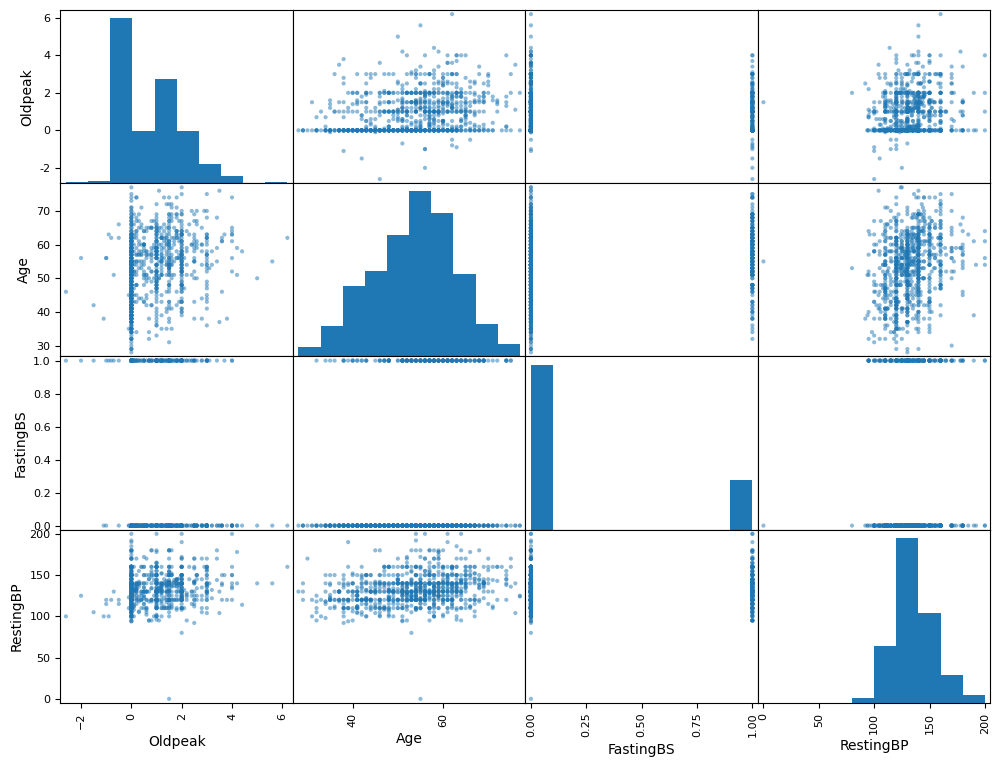

In [191]:
from pandas.plotting import scatter_matrix

attributes = ["Oldpeak", "Age", "FastingBS", "RestingBP"]
scatter_matrix(df[attributes], figsize=(12,9))
plt.show()

In [192]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(max_iter=1000,random_state=42)
log_clf.fit(X_train, y_train)
log_clf.predict(X_train)

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,

In [193]:
from sklearn.model_selection import cross_val_score

y_pred = cross_val_score(log_clf, X_train, y_train, cv = 3, scoring="accuracy")
print(y_pred)

[0.86938776 0.84897959 0.81967213]


In [194]:
from sklearn.model_selection import cross_val_predict

y_cross_pred = cross_val_predict(log_clf, X_train, y_train, cv=3)
print(y_cross_pred)

[1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1
 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1
 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1
 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0
 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1
 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1
 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1
 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0
 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1
 0 1 0 0 1 1 0 0 1 1 1 1 

In [195]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_cross_pred)
cm

array([[270,  58],
       [ 55, 351]], dtype=int64)

In [196]:
from sklearn.metrics import precision_score, recall_score
print("Precision Score ", precision_score(y_cross_pred, y_train))
print("Recall Score ", recall_score(y_cross_pred, y_train))

Precision Score  0.8645320197044335
Recall Score  0.8581907090464548


In [197]:
from sklearn.metrics import f1_score
print("F1_Score ", f1_score(y_cross_pred, y_train))

F1_Score  0.8613496932515338


In [198]:
y_decision_pred = log_clf.decision_function(X_train[:1])
print(y_decision_pred)
threshold = 0
y_some_decision_pred = y_decision_pred > threshold
y_some_decision_pred

[2.53689381]


array([ True])

In [199]:
y_scores = cross_val_predict(log_clf, X_train, y_train, cv=3, method="decision_function")
print(y_scores)

[ 2.07214703e+00 -1.51951709e+00  1.58453406e+00  2.90559523e+00
  3.80680086e+00 -1.04679245e+00  2.61524056e+00 -2.30056335e+00
 -2.61074740e+00 -2.98920293e+00  2.04536058e+00 -3.35461286e+00
  3.33044441e+00 -1.75282646e+00  1.15310866e+00  2.28959243e+00
  3.55807911e+00  3.13416467e+00  1.44163629e+00  4.25901945e+00
  2.86413641e+00  2.87505284e+00  1.38180681e+00 -8.60710283e-01
  5.43527856e+00 -1.58598923e+00 -8.23519178e-01  2.59433380e-01
 -4.04828484e+00 -2.00147410e+00 -1.67442205e+00 -1.90692945e+00
  3.60254658e+00  3.10712679e+00 -1.48680990e+00  8.94769447e-01
  2.70192162e+00  2.49282898e+00 -3.31346919e-01  2.81153106e+00
 -2.87834285e+00  1.88140999e+00  2.06888702e+00 -8.53819950e-01
  3.46399799e+00  5.25877915e+00 -7.58708861e-01 -3.42807211e+00
  1.37983908e+00  4.66819676e+00  3.53404425e-01  1.63673063e-01
 -1.17497051e+00 -1.98834700e-01  5.39851895e-01  2.44870864e+00
  2.93668778e+00  3.58481828e+00 -2.77286377e+00  2.10777129e+00
 -2.68303780e+00  2.00142

In [200]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

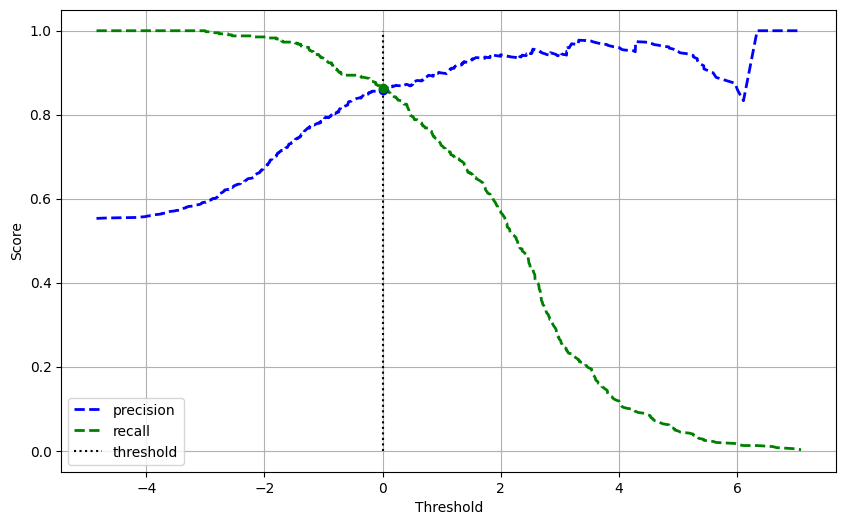

In [201]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g--", label="recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")


plt.plot(threshold, precisions[np.argmin(np.abs(thresholds - threshold))], 'bo')
plt.plot(threshold, recalls[np.argmin(np.abs(thresholds - threshold))], 'go')
plt.grid()
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.show()

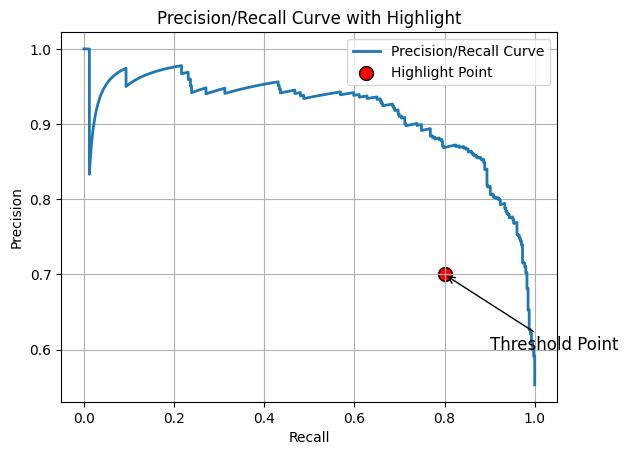

In [202]:
import matplotlib.patches as patches
plt.plot(recalls, precisions, linewidth = 2, label= "Precision/Recall Curve")

highlight_x = 0.8
highlight_y = 0.7
plt.scatter(highlight_x, highlight_y, color='red', s=100, edgecolor='black', label='Highlight Point')

plt.annotate(
    'Threshold Point', 
    xy=(highlight_x, highlight_y), 
    xytext=(highlight_x + 0.1, highlight_y - 0.1),
    arrowprops=dict(facecolor='black', arrowstyle="->"),
    fontsize=12
)

plt.grid(True)
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision/Recall Curve with Highlight")
plt.show()

In [203]:
idx_for_90_precision = (precisions >= 0.80).argmax()  # can also go for 0.70
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

-0.860710283016962

In [204]:
y_train_pred_95 = (y_scores >= threshold_for_90_precision)

In [205]:
precision_score(y_train_pred_95, y_train)

0.9211822660098522

In [206]:
recall_score(y_train_pred_95, y_train)

0.8008565310492506

In [207]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

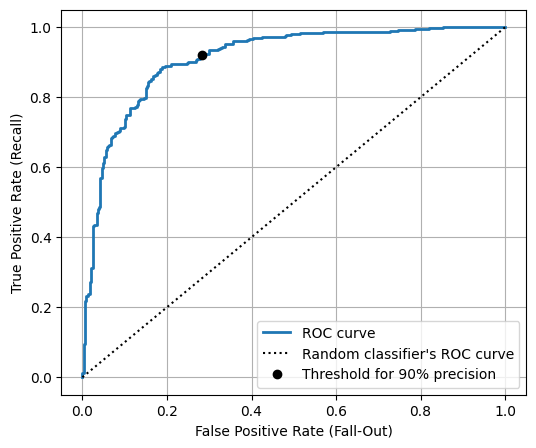

In [208]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

plt.axis()
plt.legend()
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.show()

In [209]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)

0.9120884897272619

#### The above value shows this is a good model but not very good

### Let's Create another model

In [210]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [211]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [212]:
y_forest_score = cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")
print(y_forest_score)

[0.86938776 0.87346939 0.83606557]


In [215]:
y_forest_proba = cross_val_predict(forest_clf, X_train, y_train, cv=3, method="predict_proba")
print(y_forest_proba)

[[0.17 0.83]
 [0.91 0.09]
 [0.38 0.62]
 ...
 [0.01 0.99]
 [0.58 0.42]
 [0.95 0.05]]


In [218]:
y_forest_pred = y_forest_proba[:,1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train , y_forest_pred)

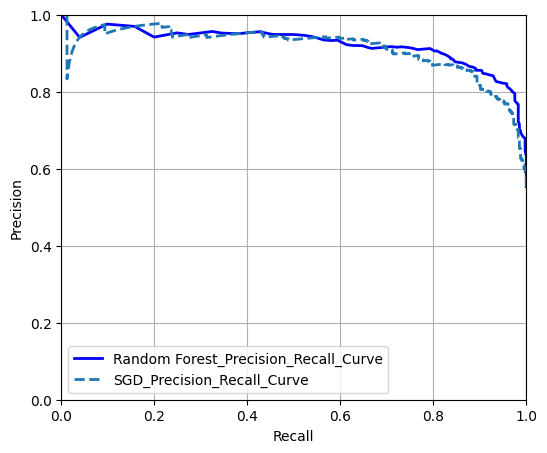

In [220]:
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest_Precision_Recall_Curve")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD_Precision_Recall_Curve")

# extra code – just beautifies and saves Figure 3–8
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
# save_fig("pr_curve_comparison_plot")

plt.show()

In [222]:
y_train_pred_forest = y_forest_proba[:, 1] >= 0.5  # positive proba ≥ 50%
f1_score(y_train, y_train_pred_forest)

0.875453446191052

In [223]:
precision_score(y_train, y_train_pred_forest)

0.8598574821852731

In [224]:
recall_score(y_train, y_train_pred_forest)

0.8916256157635468

In [225]:
roc_auc_score(y_train, y_forest_pred)

0.9271746966238135